# J = 1 to 2 parameter scans - plots
Making plots for the data for the first step of SPA

## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import uncertainties as uc

## Set plot parameters

In [57]:
plt.style.use(['ggplot'])

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.rcParams['legend.fontsize'] = 16

## Frequency scans
Start by getting data from file

In [88]:
fname = ('D:\Google Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_analyzed.hdf')

# Data for SPA1
run_name_freq_R0F2 = "1636486496 Scan SPA J = 0 to 1 microwave frequency"
df_freq_R0F2_SPA1 = pd.read_hdf(fname, run_name_freq_R0F2)

run_name_freq_R1F3_SPA1 = "1636493528 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave frequency scan"
df_freq_R1F3_SPA1 = pd.read_hdf(fname, run_name_freq_R1F3_SPA1)

# Data for SPA2
run_name_freq_R1F3 = "1636497469 Depletion on R(1), F = 3, SPA J = 1 to 2 microwave frequency scan"
df_freq_R1F3 = pd.read_hdf(fname, run_name_freq_R1F3)

run_name_freq_R2F4 = "1636503922 Accumulation on R(2), F = 4, SPA J = 1 to 2 microwave frequency scan"
df_freq_R2F4 = pd.read_hdf(fname, run_name_freq_R2F4)

### Plot depletion on R(1), F = 3

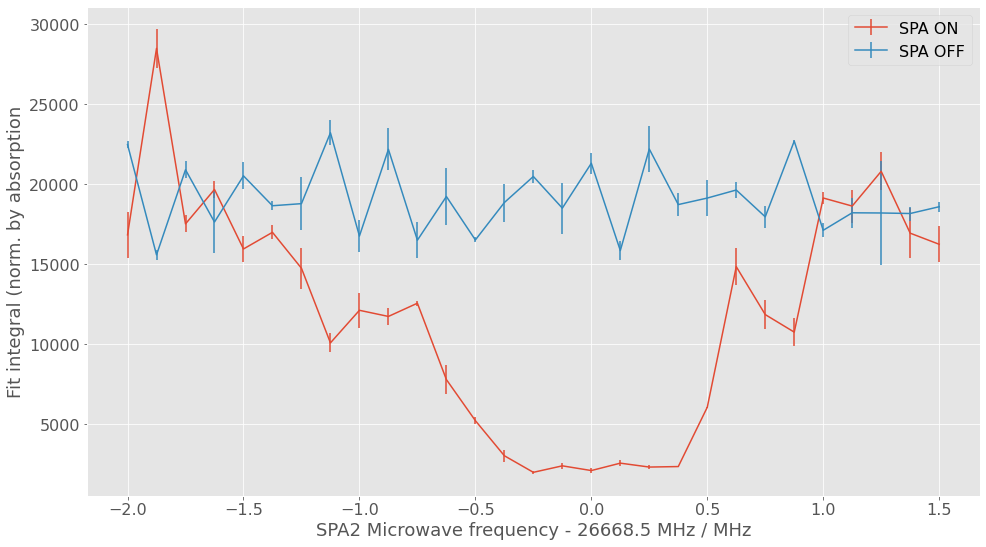

In [89]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(2*df_freq_R1F3.SPAJ12Frequency/1e6 - 26668.5, df_freq_R1F3.IntegratedFluorescence_ON,
            yerr = df_freq_R1F3.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(2*df_freq_R1F3.SPAJ12Frequency/1e6 - 26668.5, df_freq_R1F3.IntegratedFluorescence_OFF, 
            yerr = df_freq_R1F3.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("SPA2 Microwave frequency - 26668.5 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption")
ax.legend()

Text(0, 0.5, 'Remaining population in J = 0, F = 1')

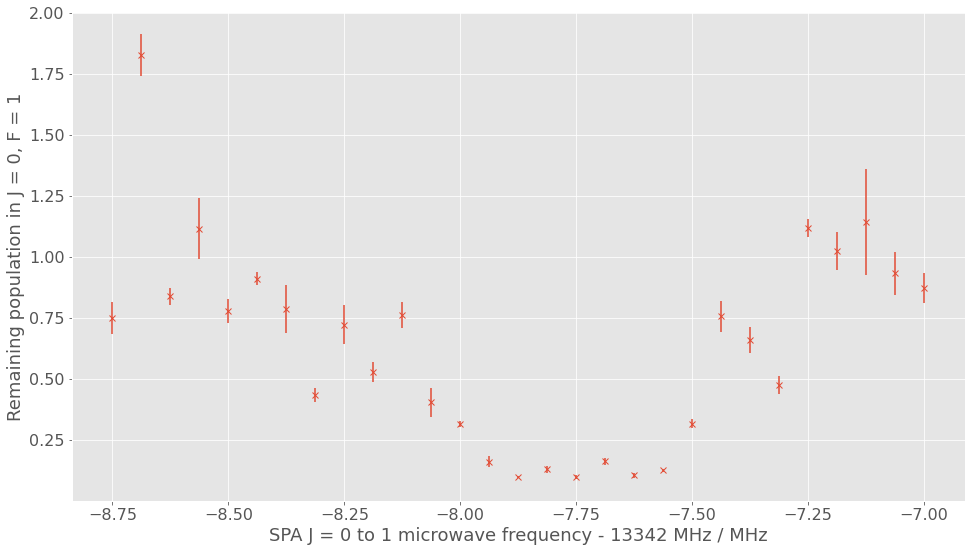

In [90]:
fig, ax = plt.subplots(figsize = (16,9))

df_freq_R1F3["pop_J0F1"] = df_freq_R1F3.IntegratedFluorescence_ON/df_freq_R1F3.IntegratedFluorescence_OFF
df_freq_R1F3["pop_J0F1_err"] = (np.sqrt(
                                (df_freq_R1F3.IntegratedFluorescence_ON_err/df_freq_R1F3.IntegratedFluorescence_ON)**2
                                + (df_freq_R1F3.IntegratedFluorescence_OFF_err/df_freq_R1F3.IntegratedFluorescence_OFF)**2)
                                * df_freq_R1F3.pop_J0F1)

ax.errorbar(df_freq_R1F3.SPAJ12Frequency/1e6 - 13342, df_freq_R1F3.pop_J0F1, df_freq_R1F3.pop_J0F1_err, marker = 'x', ls = '')
ax.set_xlabel("SPA J = 0 to 1 microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("Remaining population in J = 0, F = 1")

### Plot accumulation on R(2), F = 4

Text(0, 0.5, 'Fit integral (norm. by absorption)')

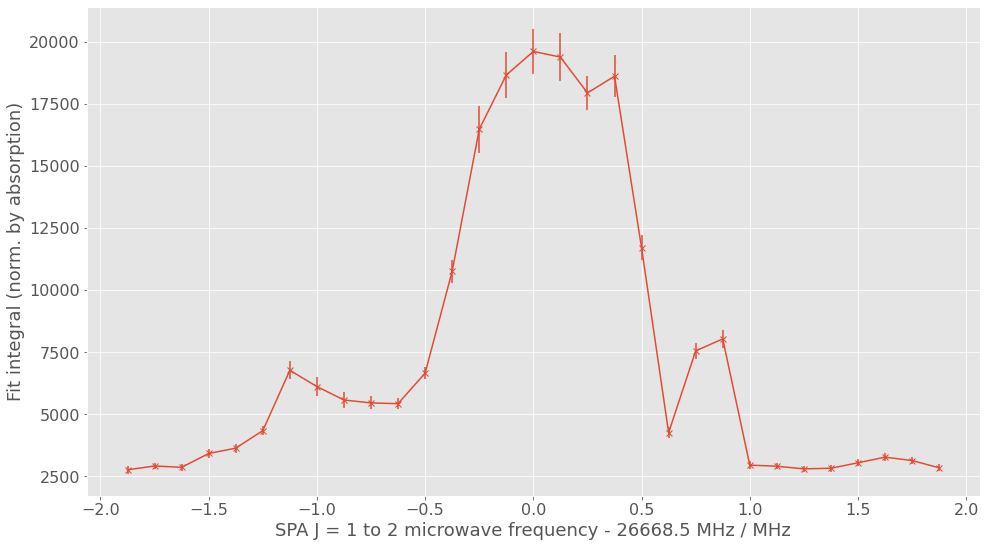

In [91]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_freq_R2F4.SPAJ12Frequency/1e6*2 - 26668.5, df_freq_R2F4.IntegratedFluorescence, 
            yerr = df_freq_R2F4.IntegratedFluorescence_err, label = 'SPA ON', marker = 'x')
ax.set_xlabel("SPA J = 1 to 2 microwave frequency - 26668.5 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption)")

### Depletion and accumulation together

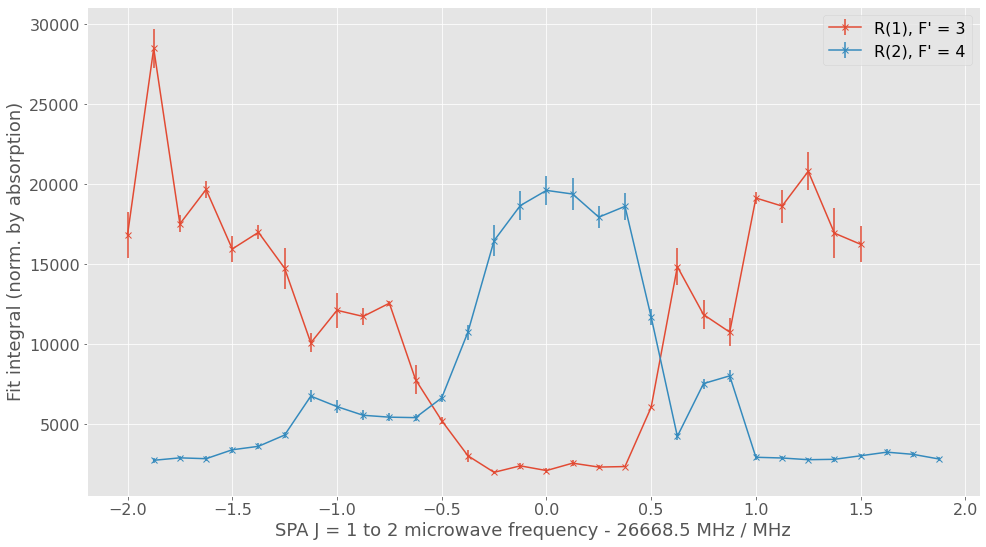

In [92]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_freq_R1F3.SPAJ12Frequency/1e6*2 - 26668.5, df_freq_R1F3.IntegratedFluorescence_ON, 
            yerr = df_freq_R1F3.IntegratedFluorescence_ON_err, label = "R(1), F' = 3", marker = 'x')
ax.errorbar(df_freq_R2F4.SPAJ12Frequency/1e6*2 - 26668.5, df_freq_R2F4.IntegratedFluorescence, 
            yerr = df_freq_R2F4.IntegratedFluorescence_err, label = "R(2), F' = 4", marker = 'x')
ax.set_xlabel("SPA J = 1 to 2 microwave frequency - 26668.5 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()

### SPA2 efficiency vs frequency

In [18]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [66]:
# Define signal sizes

# SPA1
# Figure out which index corresponds to 13342 MHz for the SPA1 tests
idx = (df_freq_R0F2_SPA1.SPAJ01Frequency/1e6 - 13342).tolist().index(0.)

S_0_ON = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_ON[idx],
                    df_freq_R0F2_SPA1.IntegratedFluorescence_ON_err[idx])
S_0_OFF = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_OFF[idx],
                     df_freq_R0F2_SPA1.IntegratedFluorescence_OFF_err[idx])
S_1_ON = ufloat(df_freq_R1F3_SPA1.IntegratedFluorescence[idx],
                    df_freq_R1F3_SPA1.IntegratedFluorescence_err[idx])
S_1_OFF = ufloat(np.mean(df_freq_R1F3_SPA1[:1].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R1F3_SPA1[:1].IntegratedFluorescence_err**2))/1)

# SPA2
Σ_1_ON = unp.uarray(df_freq_R1F3.IntegratedFluorescence_ON[1:],df_freq_R1F3.IntegratedFluorescence_ON_err[1:])
Σ_1_OFF = unp.uarray(df_freq_R1F3.IntegratedFluorescence_OFF[1:],df_freq_R1F3.IntegratedFluorescence_OFF_err[1:])
Σ_2_ON = unp.uarray(df_freq_R2F4.IntegratedFluorescence[:28],df_freq_R2F4.IntegratedFluorescence_err[:28])
Σ_2_OFF = ufloat(np.mean(df_freq_R2F4[-4:].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R2F4[-4:].IntegratedFluorescence_err**2))/2)

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10
n_gamma_2 = 2.13

# Calculate efficiency based on depletion for SPA1
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation for SPA1
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

# Calculate efficiency based on depletion for SPA2
e01 = e01_dep
e12_dep = (
    7*n_gamma_2
       *(5*e01*n_gamma_1*S_0_OFF + 5*n_gamma_0*S_1_OFF - 3*e01*n_gamma_0*S_1_OFF - 5*n_gamma_0*Σ_1_ON)
    /(7*n_gamma_2*(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF)
       - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

e12_acc = (
    35*n_gamma_0*n_gamma_1*(Σ_2_ON - Σ_2_OFF)
    /(7*n_gamma_2
      *(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF) - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

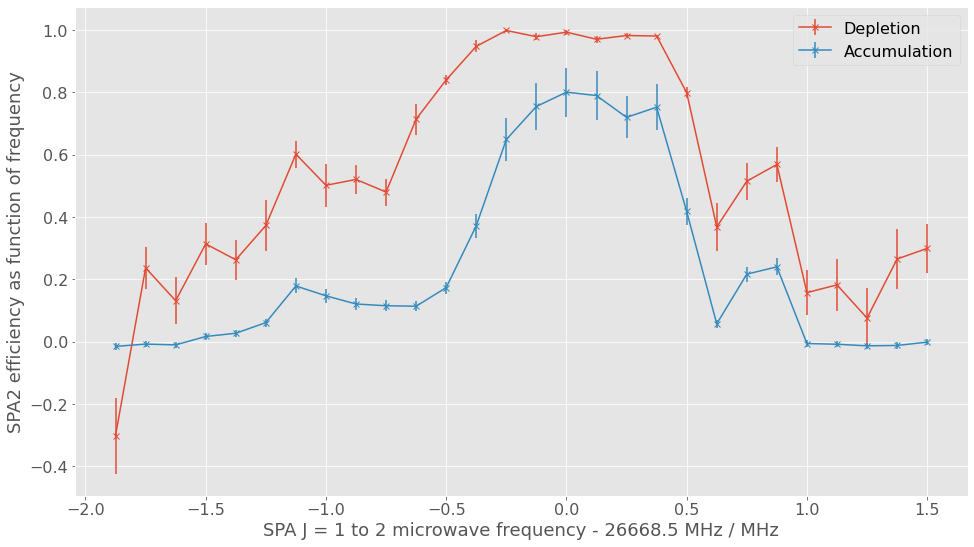

In [68]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 1 to 2 microwave frequency - 26668.5 MHz / MHz")
ax.set_ylabel("SPA2 efficiency as function of frequency")
ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_dep), 
            yerr = unp.std_devs(e12_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_acc), 
            yerr = unp.std_devs(e12_acc), label = 'Accumulation', marker = 'x')

ax.legend()

## Microwave power scans
Start by getting data from file

In [50]:
fname = ('D:\Google Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_analyzed.hdf')

run_name_pow_R1F3 = "1636499536 Depletion on R(1), F = 3, SPA J = 1 to 2 microwave power  scan"
df_pow_R1F3 = pd.read_hdf(fname, run_name_pow_R1F3)

run_name_pow_R2F4 = "1636502355 Accumulation on R(2), F = 4, SPA J = 1 to 2 microwave power scan"
df_pow_R2F4 = pd.read_hdf(fname, run_name_pow_R2F4)

### Plot depletion on R(1), F = 3

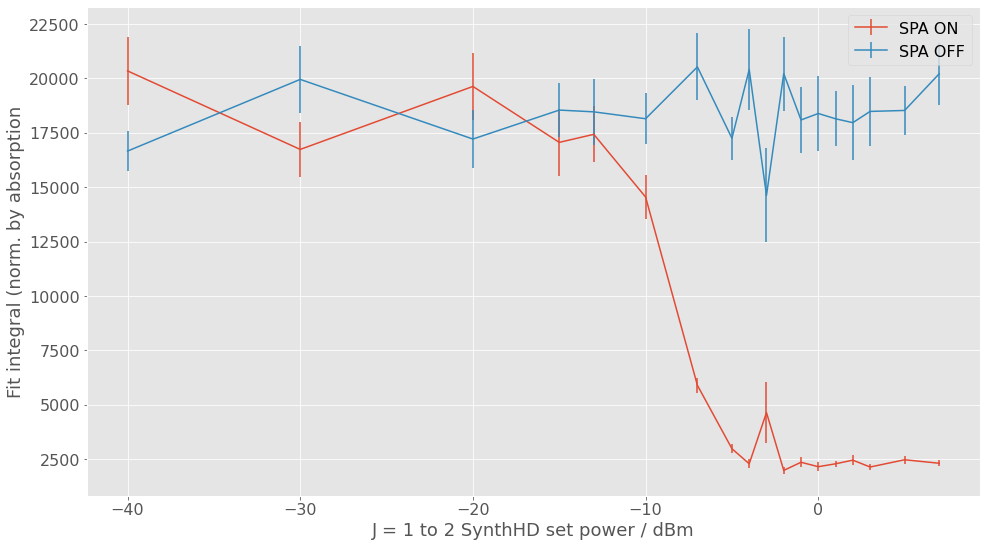

In [54]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R1F3.SPAJ12Power, df_pow_R1F3.IntegratedFluorescence_ON,
            yerr = df_pow_R1F3.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_pow_R1F3.SPAJ12Power, df_pow_R1F3.IntegratedFluorescence_OFF, 
            yerr = df_pow_R1F3.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("J = 1 to 2 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption")
ax.legend()

### Plot accumulation on R(2), F = 4

Text(0, 0.5, 'Fit integral (norm. by absorption)')

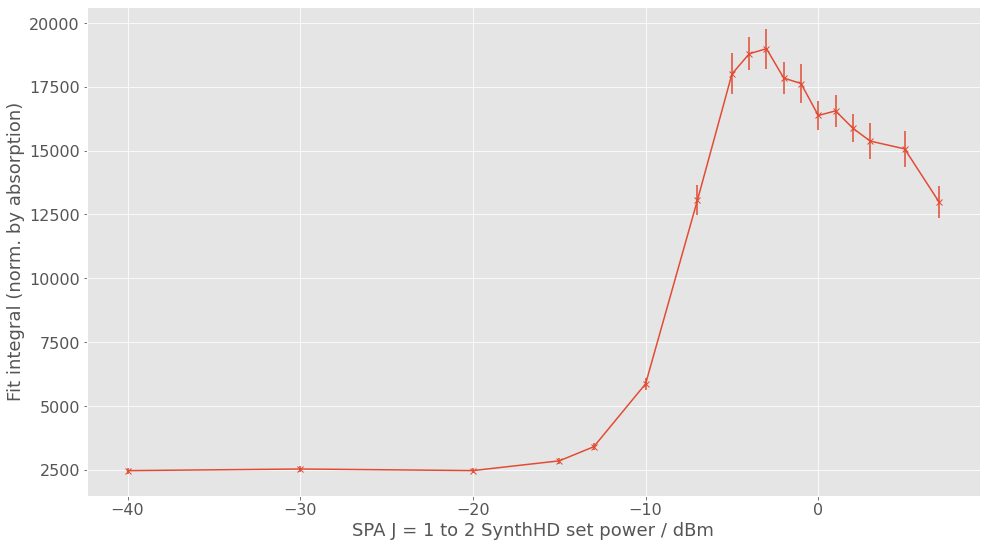

In [56]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R2F4.SPAJ12Power, df_pow_R2F4.IntegratedFluorescence, 
            yerr = df_pow_R2F4.IntegratedFluorescence_err, label = 'SPA ON', marker = 'x')
ax.set_xlabel("SPA J = 1 to 2 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")

### Depletion and accumulation together

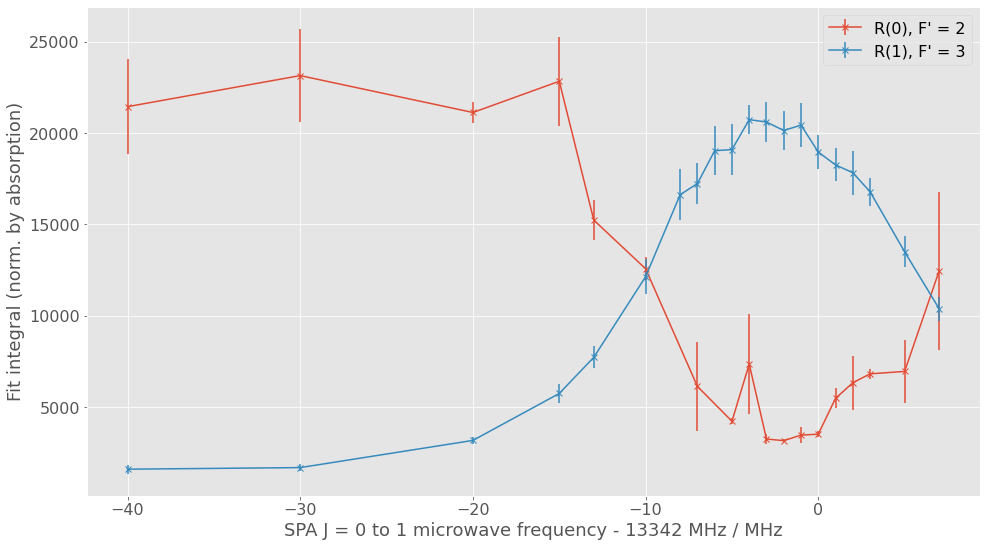

In [41]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R1F3.SPAJ12Power, df_pow_R1F3.IntegratedFluorescence_ON, 
            yerr = df_pow_R1F3.IntegratedFluorescence_ON_err, label = "R(1), F' = 3", marker = 'x')
ax.errorbar(df_pow_R2F4.SPAJ01Power, df_pow_R2F4.IntegratedFluorescence, 
            yerr = df_pow_R1F3.IntegratedFluorescence_err, label = "R(2), F' = 4", marker = 'x')
ax.set_xlabel("SPA J = 1 to 2 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()

### SPA1 efficiency vs power

In [24]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [86]:
# Define signal sizes

# SPA1
# Figure out which index corresponds to 13342 MHz for the SPA1 tests
idx = (df_freq_R0F2_SPA1.SPAJ01Frequency/1e6 - 13342).tolist().index(0.)

S_0_ON = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_ON[idx],
                    df_freq_R0F2_SPA1.IntegratedFluorescence_ON_err[idx])
S_0_OFF = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_OFF[idx],
                     df_freq_R0F2_SPA1.IntegratedFluorescence_OFF_err[idx])
S_1_ON = ufloat(df_freq_R1F3_SPA1.IntegratedFluorescence[idx],
                    df_freq_R1F3_SPA1.IntegratedFluorescence_err[idx])
S_1_OFF = ufloat(np.mean(df_freq_R1F3_SPA1[:1].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R1F3_SPA1[:1].IntegratedFluorescence_err**2))/1)

# SPA2
Σ_1_ON = unp.uarray(df_pow_R1F3.IntegratedFluorescence_ON,df_pow_R1F3.IntegratedFluorescence_ON_err)
Σ_1_OFF = unp.uarray(df_pow_R1F3.IntegratedFluorescence_OFF,df_pow_R1F3.IntegratedFluorescence_OFF_err)
Σ_2_ON = unp.uarray(df_pow_R2F4.IntegratedFluorescence,df_pow_R2F4.IntegratedFluorescence_err)
Σ_2_OFF = ufloat(np.mean(df_pow_R2F4.IntegratedFluorescence[:1]), 
                 np.sqrt(np.sum(df_pow_R2F4[:1].IntegratedFluorescence_err**2))/1)

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10
n_gamma_2 = 2.13

# Calculate efficiency based on depletion for SPA1
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation for SPA1
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

# Calculate efficiency based on depletion for SPA2
e01 = e01_dep
e12_pow_dep = (
    7*n_gamma_2
       *(5*e01*n_gamma_1*S_0_OFF + 5*n_gamma_0*S_1_OFF - 3*e01*n_gamma_0*S_1_OFF - 5*n_gamma_0*Σ_1_ON)
    /(7*n_gamma_2*(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF)
       - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

e12_pow_acc = (
    35*n_gamma_0*n_gamma_1*(Σ_2_ON - Σ_2_OFF)
    /(7*n_gamma_2
      *(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF) - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

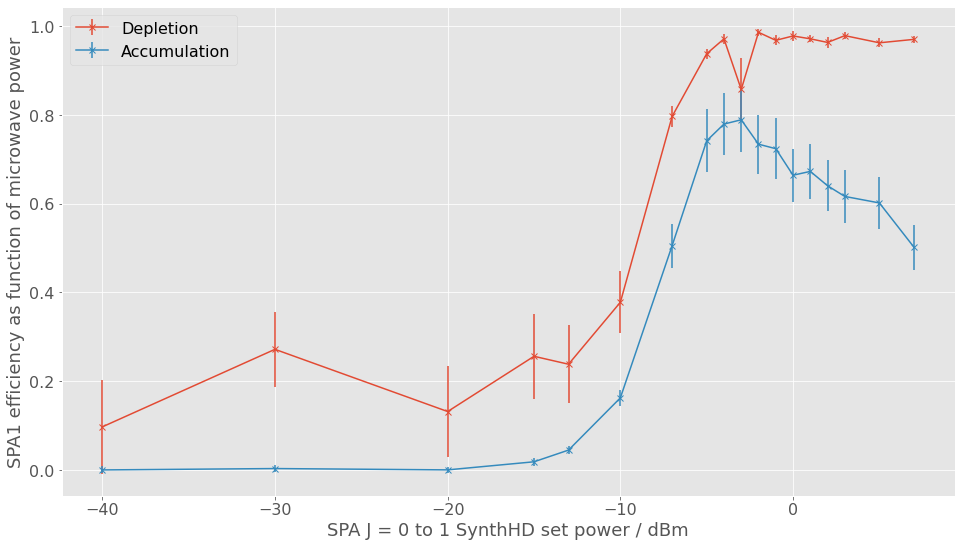

In [87]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("SPA1 efficiency as function of microwave power")
ax.errorbar(df_pow_R1F3.SPAJ12Power, unp.nominal_values(e12_pow_dep), 
            yerr = unp.std_devs(e12_pow_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_pow_R1F3.SPAJ12Power, unp.nominal_values(e12_pow_acc), 
            yerr = unp.std_devs(e12_pow_acc), label = 'Accumulation', marker = 'x')

ax.legend()